<a href="https://colab.research.google.com/github/pmama/DeepLearningConcepts/blob/main/kc_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='darkviolet'>**House Prices Prediction using TensorFlow**</font>
![Image Description](https://soho.com.au/articles/wp-content/uploads/2023/06/Untitled-design-3-1024x538.png)


### **Dataset**
>>This dataset contains house sale prices for King County, which includes Seattle.
>>It includes homes sold between May 2014 and May 2015.
>>21 columns. (features)
21597 rows.

 **o Feature Columns**

- **`id`**         : Unique ID for each home sold
- **`date`**       : Date of the home sale
- **`price`**      : Price of each home sold
- **`bedrooms`**   : Number of bedrooms
- **`bathrooms`**  : Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- **`sqft_living`**: Square footage of the apartments interior living space
- **`sqft_lot`**   : Square footage of the land space
- **`floors`**    : Number of floors
- **`waterfront`**: - A dummy variable for whether the apartment was - overlooking the waterfront or not
- **`view`**: An index from 0 to 4 of how good the view of the property was
- **`condition`**: - An index from 1 to 5 on the condition of the apartment,
- **`grade`**: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- **`sqft_above`**: The square footage of the interior housing space that is above ground level
- **`sqft_basement`**: The square footage of the interior housing space that is below ground level
- **`yr_built`**: The year the house was initially built
- **`yr_renovated`**: The year of the house’s last renovation
- **`zipcode`**: What zipcode area the house is in
- **`lat`**: Lattitude
- **`long`**: Longitude
- **`sqft_living15`**: The square footage of interior housing - living - space for the nearest 15 neighbors
- **`sqft_lot15`**: The square footage of the land lots of the nearest 15 neighbors

## <font color='darkcyan'>**Mounting Google Drives**</font>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <font color='teal'>**Importing Necessary Libraries**</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import plotly.express as px

import  warnings
warnings.filterwarnings('ignore')

# <font color='teal'>**Loading and Reading  Dataset**</font>

In [3]:
file_path='/content/drive/MyDrive/data/kc_house_data.csv'
df = pd.read_csv(file_path)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## <font color='teal'>**Checking Missing Value**</font>

In [6]:
null_percentage = df.isnull().sum()*100/len(df)
null_df = pd.DataFrame(null_percentage[null_percentage > 0], columns=["Percentage Missing"])
null_df

,Percentage Missing
sqft_above,0.009254


#### <font color='teal'>**Missing Value Imputation**</font>

In [7]:
df.sqft_above.fillna(df.sqft_above.median(), inplace = True)

In [8]:
df.isnull().sum()*100/len(df)

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

In [9]:
cat_col=[]
for col in df.columns:
  print(col,'  : ',df[col].nunique())
  #print()
  if df[col].nunique()<15:
    cat_col.append(col)
print('==='*30)
print('categorical_col :', cat_col)
print('==='*30)
for col in cat_col:
  print(col, ' : ',df[col].unique().tolist())

id   :  21436
date   :  372
price   :  4028
bedrooms   :  13
bathrooms   :  30
sqft_living   :  1038
sqft_lot   :  9782
floors   :  6
waterfront   :  2
view   :  5
condition   :  5
grade   :  12
sqft_above   :  946
sqft_basement   :  306
yr_built   :  116
yr_renovated   :  70
zipcode   :  70
lat   :  5034
long   :  752
sqft_living15   :  777
sqft_lot15   :  8689
categorical_col : ['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
bedrooms  :  [3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]
floors  :  [1.0, 2.0, 1.5, 3.0, 2.5, 3.5]
waterfront  :  [0, 1]
view  :  [0, 3, 4, 2, 1]
condition  :  [3, 5, 4, 1, 2]
grade  :  [7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13, 1]


In [10]:
df.describe(exclude = 'object').T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## <font color='teal'>**Exploratory Data Analysis (EDA)**</font>

                     Total no. of Unique Values
waterfront          2
view                5
condition           5
floors              6
grade              12
bedrooms           13
bathrooms          30
yr_renovated       70
zipcode            70
yr_built          116
sqft_basement     306
long              752
sqft_living15     777
sqft_above        946
sqft_living      1038
price            4028
lat              5034
sqft_lot15       8689
sqft_lot         9782
dtype: int64


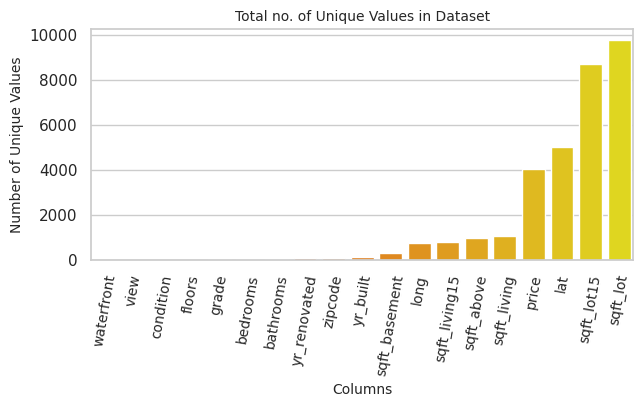

In [11]:
# Count the number of unique values in each column
def check_unquie_count(df):
    unique_counts = df.nunique().sort_values()
    print('=='*30)
    print('  '*10, 'Total no. of Unique Values')
    print('=='*30)
    print(unique_counts)
    print('=='*30)
# Create a bar plot or count plot of unique values

    plt.figure(figsize=(7, 3))
    sns.barplot(x=unique_counts.index, y=unique_counts.sort_values(),palette='autumn' )

    plt.xticks(rotation=80, fontsize= 10)
    plt.yticks(  )
    plt.xlabel('Columns',fontsize=10)
    plt.ylabel('Number of Unique Values', fontsize=10)
    plt.title('Total no. of Unique Values in Dataset', fontsize=10)
    plt.show()

check_unquie_count(df.iloc[:,2:])

7252    7700000.0
3914    7062500.0
9254    6885000.0
4411    5570000.0
1448    5350000.0
1315    5300000.0
1164    5110800.0
8092    4668000.0
2626    4500000.0
8638    4489000.0
Name: price, dtype: float64

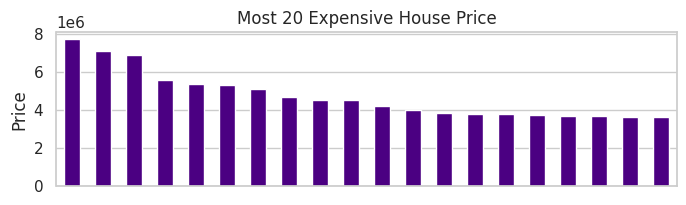

In [12]:
price_sorted = df['price'].sort_values(ascending=False)
plt.figure(figsize =(8,2))
price_sorted.head(20).plot(kind='bar', xticks=[], color ='indigo')
plt.ylabel('Price')
plt.title('Most 20 Expensive House Price')
price_sorted.head(10)

Text(0, 0.5, 'Price')

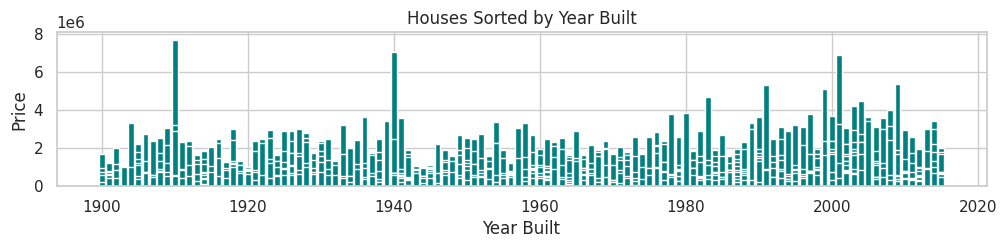

In [13]:
df_sorted = df.sort_values(by='yr_built')
plt.figure(figsize =(12,2))
plt.bar(df_sorted['yr_built'], df_sorted['price'], color='teal')
plt.title('Houses Sorted by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Price')


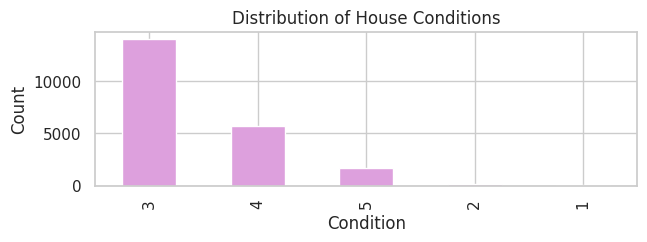

In [14]:
plt.figure(figsize=(7,2))
df['condition'].value_counts().plot(kind='bar', color ='plum')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Distribution of House Conditions')
plt.show()

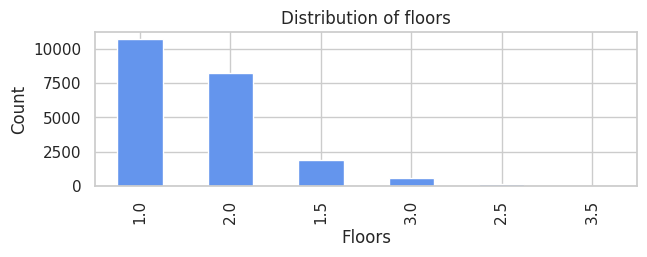

In [15]:
plt.figure(figsize=(7,2))
df['floors'].value_counts().plot(kind='bar', color ='cornflowerblue')
plt.xlabel('Floors')
plt.ylabel('Count')
plt.title('Distribution of floors')
plt.show()

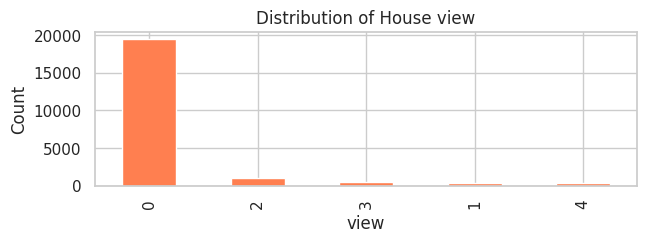

In [16]:
plt.figure(figsize=(7,2))
df['view'].value_counts().plot(kind='bar', color ='coral')
plt.xlabel('view')
plt.ylabel('Count')
plt.title('Distribution of House view')
plt.show()

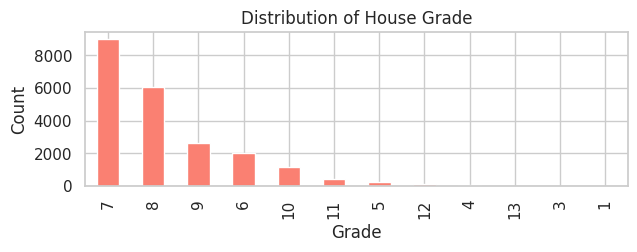

In [17]:
plt.figure(figsize=(7,2))
df['grade'].value_counts().plot(kind='bar', color ='salmon')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of House Grade')
plt.show()

In [18]:
df.groupby(['grade','price'])['price'].count()

grade  price    
1      142000.0     1
3      75000.0      1
       262000.0     1
       280000.0     1
4      80000.0      1
                   ..
13     3200000.0    1
       3800000.0    2
       5570000.0    1
       6885000.0    1
       7700000.0    1
Name: price, Length: 6693, dtype: int64

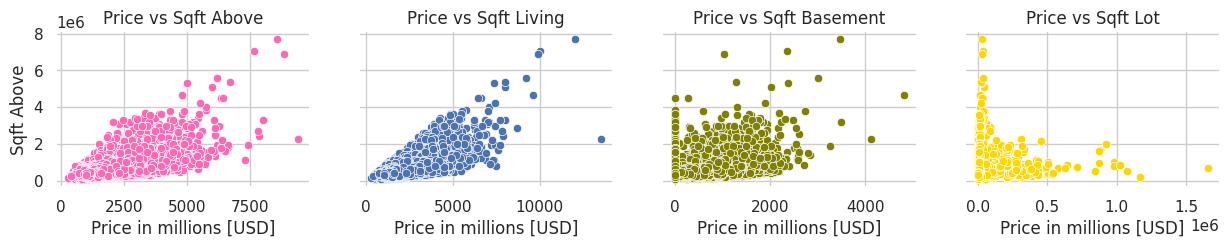

In [19]:

f, axes = plt.subplots(1, 4,figsize=(15,2),sharey= True)
sns.scatterplot(y='price',x='sqft_above', data=df, ax=axes[0], color ='hotpink')
sns.scatterplot(y='price',x='sqft_living', data=df, ax=axes[1])
sns.scatterplot(y='price',x='sqft_basement', data=df, ax=axes[2], color ='olive')
sns.scatterplot(y='price',x='sqft_lot', data=df, ax=axes[3],color ='gold')
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price in millions [USD]', ylabel='Sqft Above', title='Price vs Sqft Above')
axes[1].set(xlabel='Price in millions [USD]', ylabel='Sqft Living', title='Price vs Sqft Living')
axes[2].set(xlabel='Price in millions [USD]', ylabel='Sqft Basement', title='Price vs Sqft Basement')
axes[3].set(xlabel='Price in millions [USD]', ylabel='Sqft Lot', title='Price vs Sqft Lot')
# axes[1].yaxis.set_label_position("right")
# axes[1].yaxis.tick_right()
plt.show()

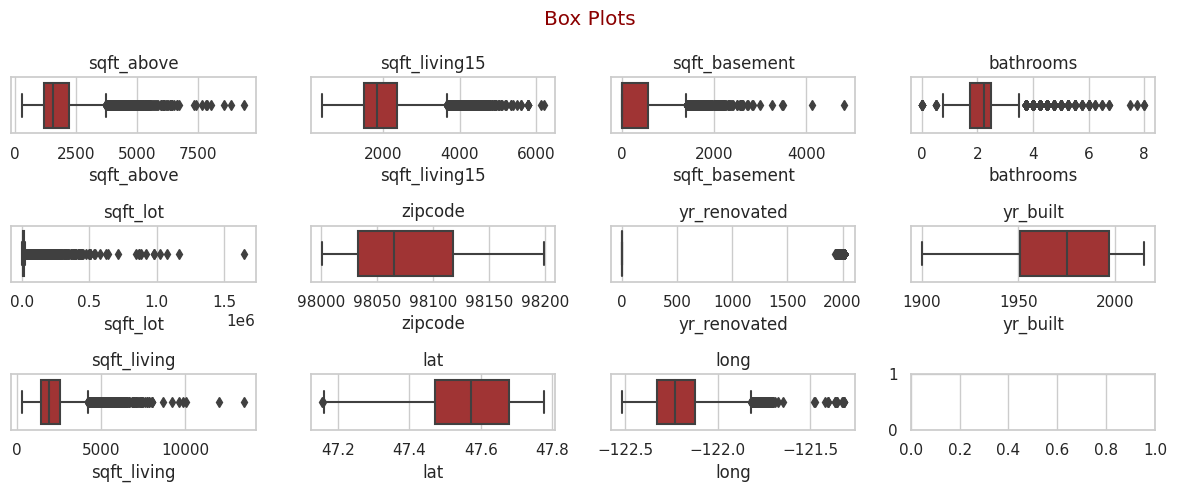

In [20]:
fig, axes = plt.subplots(3, 4, figsize=(12, 5))
axes = axes.flatten()
columns_to_plot= list(set(df.iloc[:,2:-1].columns) - set(cat_col))
columns_to_plot.remove('price')
plt.suptitle('Box Plots', color ='darkred')
for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=df, x=col, ax=axes[i], color='firebrick')
    axes[i].set_title(f'{col}')
plt.tight_layout()
plt.show()


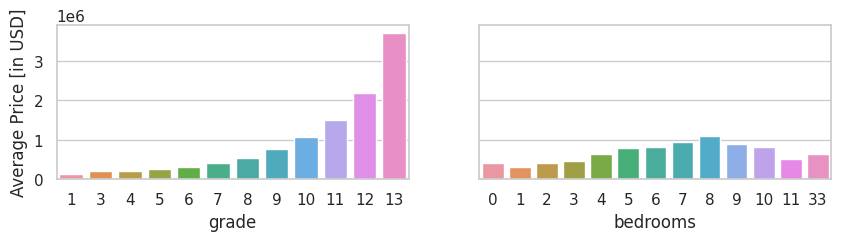

In [21]:
price_grade =df.groupby('grade')['price'].mean()
price_bedroom =df.groupby('bedrooms')['price'].mean()

f, axes = plt.subplots(1, 2,figsize=(10,2),sharey= True)

sns.barplot(x=price_grade.index, y=price_grade.values,ax=axes[0])
axes[0].set(ylabel='Average Price [in USD]')
sns.barplot(x=price_bedroom.index, y=price_bedroom.values,ax=axes[1])

plt.show()

## **Finding Correlation**

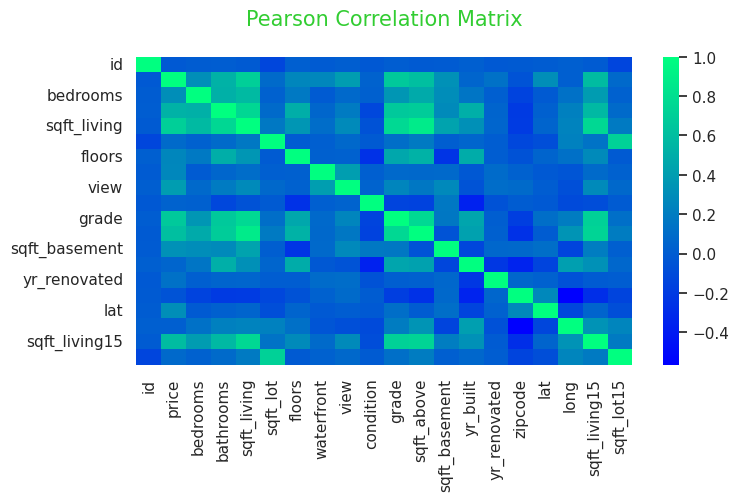

In [22]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(8,4))
plt.title('Pearson Correlation Matrix\n',fontsize=15, color='limegreen')
sns.heatmap(df.corr(),cmap="winter", )
plt.show()

In [23]:
len(df.iloc[:,1:].corr()['price'])

19

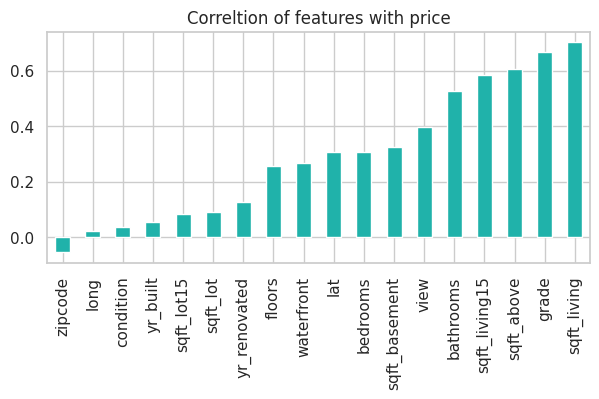

In [24]:
df.iloc[:,1:].corr()['price'].sort_values().head(18).plot(kind='bar', color ='lightseagreen',figsize=(7,3))
plt.title('Correltion of features with price')
plt.show()

In [25]:
# dropping irrelevant columns
df.drop(['id'], axis=1, inplace= True)
df = df.drop('date',axis=1)

In [26]:
df.shape

(21613, 19)

In [27]:
# splitting into target and features
x = df.drop('price', axis=1)
y = df['price']

In [28]:
print('xshape :', x.shape)
print('yshape :', y.shape)

xshape : (21613, 18)
yshape : (21613,)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 12)
print('x_train shape :', x_train.shape)
print('x_test shape :', x_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

x_train shape : (17290, 18)
x_test shape : (4323, 18)
y_train shape : (17290,)
y_test shape : (4323,)


## **Feature Scaling**
#### -<font color='darkred'>**"If you are not doing Feature scaling, then it is a crime!!"**</font>
- Scaling features can improve the performance of DNNs.
- Feature scaling helps in achieving faster convergence and finding a better minimum.

In [31]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# **Importing Tensorflow package**

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.utils import plot_model

In [33]:
def fun_adj_r2(r2, n, p):  # n is # of records, p is # of features
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    return adj_r2


In [34]:
! pip install visualkeras
import visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 6.1 MB/s eta 0:00:00


# **Approach  No.1 (3 hidden layers)**

In [35]:
#==================================================================
ann0 = Sequential()
# 1st hidden layer
ann0.add(Dense(units= 32, activation ='relu',kernel_initializer=HeNormal(), input_dim=18))
# 2nd hidden layer
ann0.add(Dense(units=8,activation ='relu'))
# 3rd hidden layer
ann0.add(Dense(units=8,activation ='relu'))
# output
ann0.add(Dense(units=1,activation ='linear'))
#=========================================================
ann0.compile(optimizer ='Adam', loss=MeanSquaredError())
#=========================================================

ann0.summary()
print()
print('Model Structure')
print()
visualkeras.layered_view(ann0)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                608       
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 953
Trainable params: 953
Non-trainable params: 0
_________________________________________________________________

Model Structure



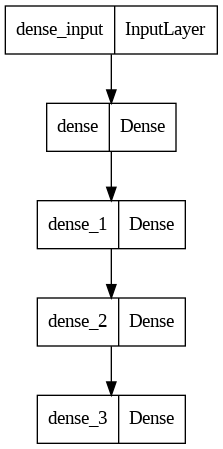

In [36]:
plot_model(ann0)

In [37]:
ann0.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),
          epochs=200)

Epoch 1/200
541/541 [==============================] - 4s 3ms/step - loss: 418412625920.0000 - val_loss: 449143111680.0000
Epoch 2/200
541/541 [==============================] - 2s 4ms/step - loss: 387992027136.0000 - val_loss: 373612052480.0000
Epoch 3/200
541/541 [==============================] - 2s 4ms/step - loss: 264661827584.0000 - val_loss: 199343767552.0000
Epoch 4/200
541/541 [==============================] - 5s 8ms/step - loss: 123991326720.0000 - val_loss: 96819462144.0000
Epoch 5/200
541/541 [==============================] - 5s 9ms/step - loss: 78773125120.0000 - val_loss: 78666153984.0000
Epoch 6/200
541/541 [==============================] - 3s 6ms/step - loss: 69507137536.0000 - val_loss: 72129077248.0000
Epoch 7/200
541/541 [==============================] - 2s 4ms/step - loss: 64601722880.0000 - val_loss: 67920777216.0000
Epoch 8/200
541/541 [==============================] - 3s 5ms/step - loss: 60715327488.0000 - val_loss: 64367968256.0000
Epoch 9/200
541/541 [====

<Figure size 1500x500 with 0 Axes>

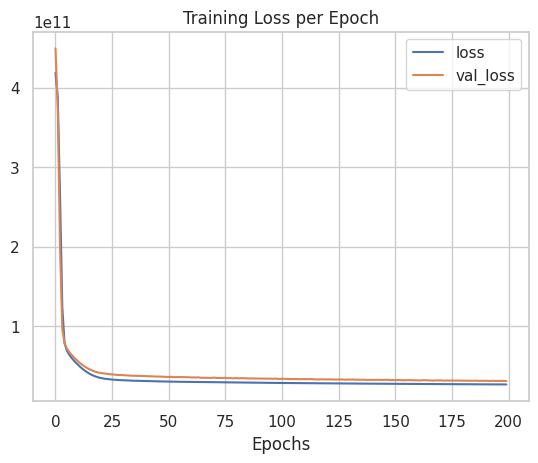

In [38]:
losses_0 = pd.DataFrame(ann0.history.history)

plt.figure(figsize=(15,5))
losses_0.plot()
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
plt.show()

In [41]:
x_test.shape[0]

4323

In [43]:
# Getting Accuracy
y_pred_0= ann0.predict(x_test)
r20 = r2_score(y_test, y_pred_0)
print('==='*15)
print('R2score :', r20)
print('==='*15)
result1 = fun_adj_r2(r20, x_test.shape[0], x_test.shape[1])
#result1 = fun_adj_r2(r20, x.shape[0], x.shape[1])
print('Adj R2score', result1)
print('==='*15)

print('mae', mean_absolute_error(y_test, y_pred_0))
print('mse', mean_squared_error(y_test, y_pred_0))
print('rmse', np.sqrt(mean_squared_error(y_test, y_pred_0)))

136/136 [==============================] - 0s 3ms/step
R2score : 0.7972010991579028
Adj R2score 0.7963529624908123
mae 103510.03642218946
mse 31160636246.627464
rmse 176523.7554739516


In [44]:

rounded_y_pred_0 = np.round(y_pred_0).astype(int)
compare_0 = pd.DataFrame({'Predicted': rounded_y_pred_0.flatten(), 'Actual': y_test.astype(int)})

# compare the actaual and predicted value of house price]
compare_0[['Actual', 'Predicted']]

,Actual,Predicted
2019,275000,316371
3435,279000,299586
15940,200500,263371
9811,750000,822658
18665,395000,355634
...,...,...
3390,579000,392082
6801,599000,733810
4775,248500,309829
10634,645000,514200


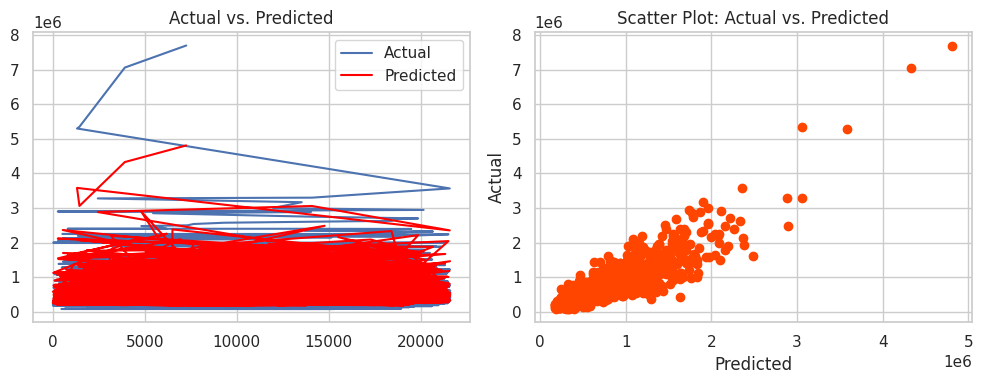

In [45]:
fig, axes =plt.subplots(1, 2, figsize=(10, 4))
sorted_actual_0 = compare_0['Actual'].sort_values()
sorted_predicted_0 = compare_0.loc[sorted_actual_0.index, 'Predicted']

axes[0].plot(sorted_actual_0, label='Actual')
axes[0].plot(sorted_predicted_0, color='red', label='Predicted')
axes[0].set_title('Actual vs. Predicted')
axes[0].legend()


axes[1].scatter(compare_0['Predicted'], compare_0['Actual'], color='orangered')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Scatter Plot: Actual vs. Predicted')

plt.tight_layout()
plt.show()

# **Approach no. 2 (5 hidden layers)**

In [46]:
#==================================================================
ann = Sequential()
# 1st hidden layer
ann.add(Dense(units= 128, activation ='relu',kernel_initializer=HeNormal(), input_dim=18))
# 2nd hidden layer
ann.add(Dense(units=128,activation ='relu'))
# 3rd hidden layer
ann.add(Dense(units=64,activation ='relu'))
# 4th hidden layer
ann.add(Dense(units=32,activation ='relu'))
# 5th hidden layer
ann.add(Dense(units=32,activation ='relu'))
# output
ann.add(Dense(units=1,activation ='linear'))
#=========================================================
# compiling
ann.compile(optimizer ='Adam', loss=MeanSquaredError())
#=========================================================
# summarising the model
print(ann.summary())
print()
print('Model Structure')
print()
# visualising the model
visualkeras.layered_view(ann)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               2432      
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,369
Trainable params: 30,369
Non-trai

In [ ]:
plot_model(ann)

Epoch 1/200
541/541 [==============================] - 3s 4ms/step - loss: 143510142976.0000 - val_loss: 45298212864.0000
Epoch 2/200
541/541 [==============================] - 3s 6ms/step - loss: 36197888000.0000 - val_loss: 40726622208.0000
Epoch 3/200
541/541 [==============================] - 6s 12ms/step - loss: 33317074944.0000 - val_loss: 38789332992.0000
Epoch 4/200
541/541 [==============================] - 6s 11ms/step - loss: 31988787200.0000 - val_loss: 37180100608.0000
Epoch 5/200
541/541 [==============================] - 4s 7ms/step - loss: 30792013824.0000 - val_loss: 35637764096.0000
Epoch 6/200
541/541 [==============================] - 4s 8ms/step - loss: 29861011456.0000 - val_loss: 34550362112.0000
Epoch 7/200
541/541 [==============================] - 6s 10ms/step - loss: 29092280320.0000 - val_loss: 34368188416.0000
Epoch 8/200
541/541 [==============================] - 4s 8ms/step - loss: 28344209408.0000 - val_loss: 33350279168.0000
Epoch 9/200
541/541 [=======

<Figure size 1500x500 with 0 Axes>

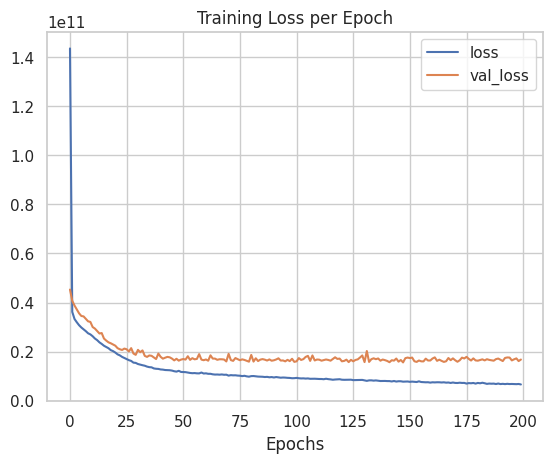

In [47]:
ann.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),
          epochs=200)
#====================================================
losses = pd.DataFrame(ann.history.history)

plt.figure(figsize=(15,5))
losses.plot()
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
plt.show()

In [62]:
# getting accuracy
y_pred= ann.predict(x_test)
r2 = r2_score(y_test, y_pred)
print('==='*15)
print('R2score :', r2)
print('==='*15)
result2 = fun_adj_r2(r2, x_test.shape[0], x_test.shape[1])
print('Adj R2score', result2)
print('==='*15)
print('mae', mean_absolute_error(y_test, y_pred))
print('mse', mean_squared_error(y_test, y_pred))
print('rmse', np.sqrt(mean_squared_error(y_test, y_pred)))

136/136 [==============================] - 1s 4ms/step
R2score : 0.8906571820384891
Adj R2score 0.8901998933016613
mae 70187.94454805691
mse 16800839464.7698
rmse 129618.05223335906


In [49]:

rounded_y_pred = np.round(y_pred).astype(int)
compare = pd.DataFrame({'Predicted': rounded_y_pred.flatten(), 'Actual': y_test.astype(int)})

# compare the actaual and predicted value of house price]
compare[['Actual', 'Predicted']]

,Actual,Predicted
2019,275000,274330
3435,279000,251408
15940,200500,230555
9811,750000,760284
18665,395000,462477
...,...,...
3390,579000,466059
6801,599000,658957
4775,248500,274231
10634,645000,558829


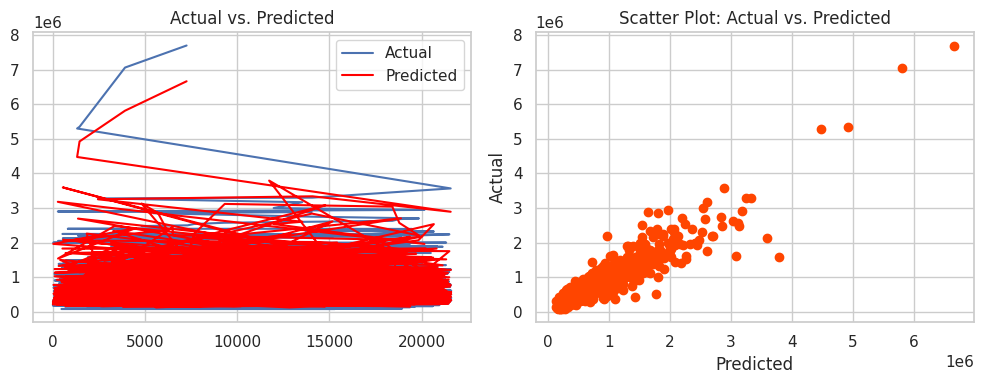

In [50]:
fig, axes =plt.subplots(1, 2, figsize=(10, 4))
sorted_actual = compare['Actual'].sort_values()
sorted_predicted = compare.loc[sorted_actual.index, 'Predicted']

axes[0].plot(sorted_actual, label='Actual')
axes[0].plot(sorted_predicted, color='red', label='Predicted')
axes[0].set_title('Actual vs. Predicted')
axes[0].legend()


axes[1].scatter(compare['Predicted'], compare['Actual'], color='orangered')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Scatter Plot: Actual vs. Predicted')

plt.tight_layout()
plt.show()


# <font color='darkorange'>**Approach 3 (with Dropout)**</font>
![Image Description](https://www.sevenmentor.com/wp-content/uploads/2022/07/dl.jpg)

- **Prevents overfitting in Deep Neural Network(DNN)**
- **It is a reguralisation tecnique commonly used in DNN.**
- **It invloves randomly "dropping out" (removing / deactivating/ setting to zero) a fraction of neurons in hidden layer during training iteration**

> #### ***Why overfitting?***
>> - complex model with mnay parameters relative  to amount of training data fit noise. Instead of learning underlying pattern in the data an overfit model may memorize the training data.


In [51]:
ann1 = Sequential()
ann1.add(Dense(128, activation ='relu',kernel_initializer=HeNormal(), input_dim=18))
ann1.add(Dropout(0.1))
ann1.add(Dense(64,activation ='relu'))
ann1.add(Dropout(0.1))
ann1.add(Dense(32,activation ='relu'))
ann1.add(Dropout(0.1))
ann1.add(Dense(8,activation ='relu'))
ann1.add(Dense(1,activation ='linear'))
ann1.compile(optimizer ='Adam', loss=MeanSquaredError())

print(ann1.summary())
print()
print('Model Structure')
print()
visualkeras.layered_view(ann1)



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               2432      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 8)                

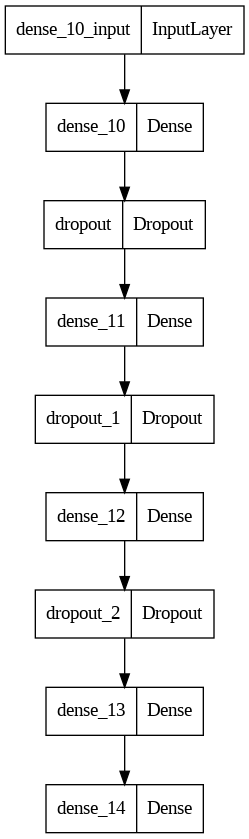

In [52]:
plot_model(ann1)

In [53]:
ann1.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),
          epochs=500)



Epoch 1/500
541/541 [==============================] - 5s 6ms/step - loss: 249034260480.0000 - val_loss: 62156566528.0000
Epoch 2/500
541/541 [==============================] - 3s 6ms/step - loss: 52598296576.0000 - val_loss: 47676084224.0000
Epoch 3/500
541/541 [==============================] - 3s 5ms/step - loss: 43208773632.0000 - val_loss: 44075532288.0000
Epoch 4/500
541/541 [==============================] - 2s 3ms/step - loss: 39631450112.0000 - val_loss: 40636002304.0000
Epoch 5/500
541/541 [==============================] - 2s 3ms/step - loss: 37484306432.0000 - val_loss: 39984566272.0000
Epoch 6/500
541/541 [==============================] - 2s 3ms/step - loss: 37555605504.0000 - val_loss: 39002173440.0000
Epoch 7/500
541/541 [==============================] - 2s 3ms/step - loss: 35646095360.0000 - val_loss: 38614482944.0000
Epoch 8/500
541/541 [==============================] - 2s 5ms/step - loss: 36390113280.0000 - val_loss: 37868728320.0000
Epoch 9/500
541/541 [==========

<Figure size 1500x500 with 0 Axes>

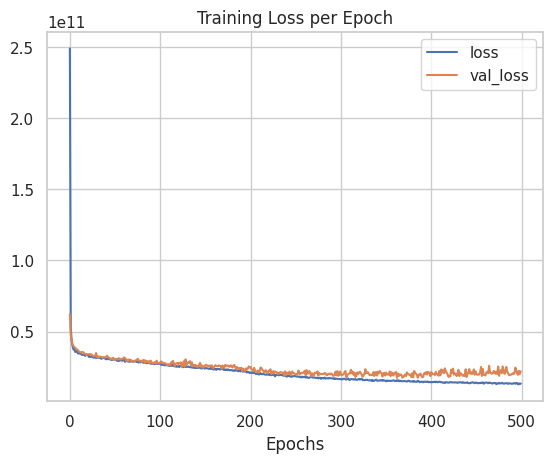

In [54]:
losses1 = pd.DataFrame(ann1.history.history)

plt.figure(figsize=(15,5))
losses1.plot()
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
plt.show()

In [55]:
y_pred1= ann1.predict(x_test)
r21 = r2_score(y_test, y_pred1)
print('==='*15)
print('R2score :', r21)
print('==='*15)

result3 = fun_adj_r2(r21, x_test.shape[0], x_test.shape[1])

print('Adj R2score', result3)
print('==='*15)

print('mae', mean_absolute_error(y_test, y_pred1))
print('mse', mean_squared_error(y_test, y_pred1))
print('rmse', np.sqrt(mean_squared_error(y_test, y_pred1)))
rounded_y_pred1 = np.round(y_pred1).astype(int)
compare1 = pd.DataFrame({'Predicted': rounded_y_pred1.flatten(), 'Actual': y_test.astype(int)})

# compare the actaual and predicted value of house price]
compare1[['Actual', 'Predicted']]

136/136 [==============================] - 0s 2ms/step
R2score : 0.8567690094709564
Adj R2score 0.856169995105361
mae 87084.06849626995
mse 22007854956.742455
rmse 148350.44643256877


,Actual,Predicted
2019,275000,258273
3435,279000,214005
15940,200500,219723
9811,750000,675976
18665,395000,413960
...,...,...
3390,579000,456896
6801,599000,591520
4775,248500,229773
10634,645000,510929


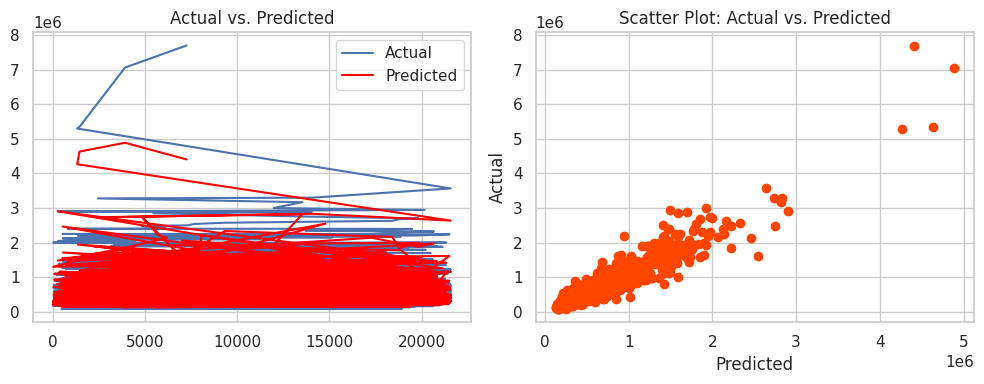

In [56]:
fig, axes =plt.subplots(1, 2, figsize=(10, 4))
sorted_actual1 = compare1['Actual'].sort_values()
sorted_predicted1 = compare1.loc[sorted_actual1.index, 'Predicted']

axes[0].plot(sorted_actual1, label='Actual')
axes[0].plot(sorted_predicted1, color='red', label='Predicted')
axes[0].set_title('Actual vs. Predicted')
axes[0].legend()


axes[1].scatter(compare1['Predicted'], compare1['Actual'], color='orangered')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Scatter Plot: Actual vs. Predicted')

plt.tight_layout()
plt.show()


# <font color='darkorange'>**Approach 4 (with Batch Normalization, 3 hidden layers)**</font>
![Image Description](https://cdn.sanity.io/images/vr8gru94/production/68cddd98ed9529e2b0edac143a47ec1b5ecbadd3-800x521.png)

In [57]:
ann2 = Sequential()
ann2.add(Dense(32, activation ='relu',kernel_initializer=HeNormal(), input_dim=18))
ann2.add(BatchNormalization())
ann2.add(Dense(8,activation ='relu'))
ann2.add(Dense(1,activation ='linear'))
ann2.compile(optimizer ='Adam', loss=MeanSquaredError())

print(ann2.summary())

visualkeras.layered_view(ann2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                608       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_16 (Dense)            (None, 8)                 264       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,009
Trainable params: 945
Non-trainable params: 64
_________________________________________________________________
None


In [58]:
ann2.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),
          epochs=100)

Epoch 1/100
541/541 [==============================] - 3s 3ms/step - loss: 419296346112.0000 - val_loss: 454190923776.0000
Epoch 2/100
541/541 [==============================] - 2s 3ms/step - loss: 417791148032.0000 - val_loss: 451317792768.0000
Epoch 3/100
541/541 [==============================] - 2s 4ms/step - loss: 413283090432.0000 - val_loss: 444431302656.0000
Epoch 4/100
541/541 [==============================] - 2s 4ms/step - loss: 405024505856.0000 - val_loss: 433311481856.0000
Epoch 5/100
541/541 [==============================] - 2s 4ms/step - loss: 392688336896.0000 - val_loss: 418433925120.0000
Epoch 6/100
541/541 [==============================] - 2s 4ms/step - loss: 376091017216.0000 - val_loss: 397750075392.0000
Epoch 7/100
541/541 [==============================] - 1s 3ms/step - loss: 355769417728.0000 - val_loss: 377196052480.0000
Epoch 8/100
541/541 [==============================] - 2s 3ms/step - loss: 331902779392.0000 - val_loss: 346543849472.0000
Epoch 9/100
541/

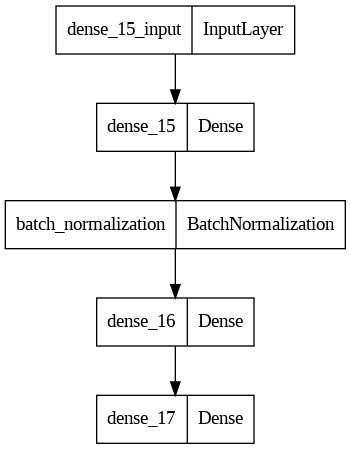

In [59]:
plot_model(ann2)

<Figure size 1500x500 with 0 Axes>

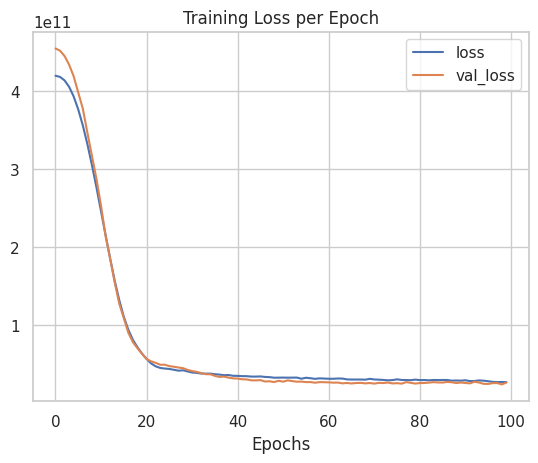

In [60]:
losses2 = pd.DataFrame(ann2.history.history)

plt.figure(figsize=(15,5))
losses2.plot()
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
plt.show()

In [64]:
y_pred2= ann2.predict(x_test)
r22 = r2_score(y_test, y_pred2)
print('==='*15)
print('R2score :', r22)

print('==='*15)
result4 = fun_adj_r2(r22, x_test.shape[0], x_test.shape[1])

print('Adj R2score', result4)
print('==='*15)
print('mae', mean_absolute_error(y_test, y_pred2))
print('mse', mean_squared_error(y_test, y_pred2))
print('rmse', np.sqrt(mean_squared_error(y_test, y_pred2)))

136/136 [==============================] - 0s 1ms/step
R2score : 0.8243616598522335
Adj R2score 0.8236271128906489
mae 95380.11719201799
mse 26987337730.037067
rmse 164278.23267261268


In [65]:
rounded_y_pred2 = np.round(y_pred2).astype(int)
compare2 = pd.DataFrame({'Predicted': rounded_y_pred2.flatten(), 'Actual': y_test.astype(int)})

# compare the actaual and predicted value of house price]
compare2[['Actual', 'Predicted']]

,Actual,Predicted
2019,275000,303001
3435,279000,212930
15940,200500,257087
9811,750000,759077
18665,395000,397396
...,...,...
3390,579000,488147
6801,599000,695437
4775,248500,311371
10634,645000,529895


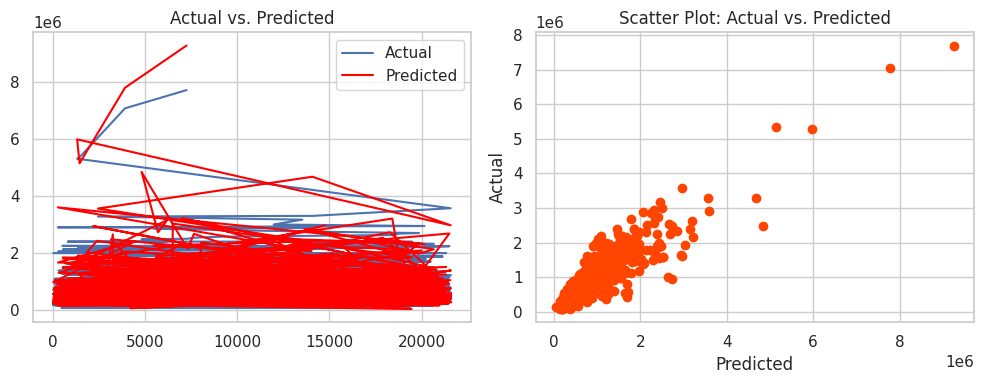

In [66]:
fig, axes =plt.subplots(1, 2, figsize=(10, 4))
sorted_actual2 = compare2['Actual'].sort_values()
sorted_predicted2 = compare2.loc[sorted_actual2.index, 'Predicted']

axes[0].plot(sorted_actual2, label='Actual')
axes[0].plot(sorted_predicted2, color='red', label='Predicted')
axes[0].set_title('Actual vs. Predicted')
axes[0].legend()


axes[1].scatter(compare2['Predicted'], compare2['Actual'], color='orangered')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Scatter Plot: Actual vs. Predicted')

plt.tight_layout()
plt.show()


# <font color='darkorange'>**Approach 5 (with Batch Normalization, 5 hidden layers)**</font>

In [79]:
ann3 = Sequential()
#1st hidden layer
ann3.add(Dense(128, activation ='relu',kernel_initializer=HeNormal(), input_dim=18))
ann3.add(BatchNormalization())
# 2nd hidden layer
ann3.add(Dense(units=128,activation ='relu'))
ann3.add(BatchNormalization())
# 3rd hidden layer
ann3.add(Dense(units=64,activation ='relu'))

# 4th hidden layer
ann3.add(Dense(units=32,activation ='relu'))
ann3.add(BatchNormalization())
# 5th hidden layer
ann3.add(Dense(units=32,activation ='relu'))

#outer layer
ann3.add(Dense(1,activation ='linear'))
#compile
ann3.compile(optimizer ='Adam', loss=MeanSquaredError())
visualkeras.layered_view(ann3)


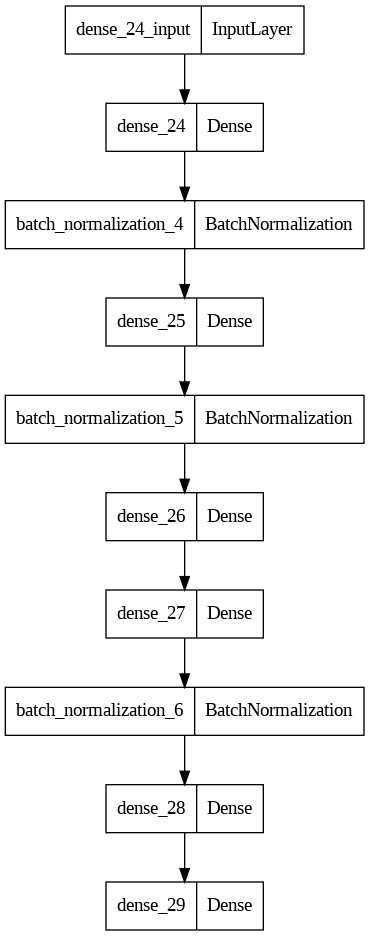

In [80]:
plot_model(ann3)

In [81]:

print(ann3.summary())
ann3.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),
          epochs=100)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               2432      
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_25 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 32)               

<Figure size 1500x500 with 0 Axes>

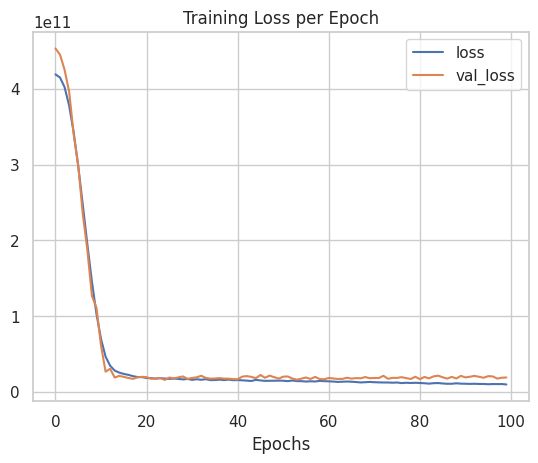

In [82]:
losses3 = pd.DataFrame(ann3.history.history)

plt.figure(figsize=(15,5))
losses3.plot()
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
plt.show()

In [83]:
mean_absolute_error,
mean_squared_error,
y_pred3= ann3.predict(x_test)
r23 = r2_score(y_test, y_pred3)
print('==='*15)
print('R2score :', r23)
print('==='*15)
result4 = fun_adj_r2(r23, x_test.shape[0], x_test.shape[1])
print('Adj R2score', result4)
print('==='*15)

print('mae', mean_absolute_error(y_test, y_pred3))
print('mse', mean_squared_error(y_test, y_pred3))
print('rmse', np.sqrt(mean_squared_error(y_test, y_pred3)))

136/136 [==============================] - 0s 2ms/step
R2score : 0.8769010071203429
Adj R2score 0.8763861879122031
mae 76210.08836410985
mse 18914515431.401833
rmse 137530.05282992453


In [84]:
rounded_y_pred3 = np.round(y_pred3).astype(int)
compare3 = pd.DataFrame({'Predicted': rounded_y_pred3.flatten(), 'Actual': y_test.astype(int)})

# compare the actaual and predicted value of house price]
compare3[['Actual', 'Predicted']]

,Actual,Predicted
2019,275000,264759
3435,279000,253754
15940,200500,163093
9811,750000,816343
18665,395000,441243
...,...,...
3390,579000,497572
6801,599000,754909
4775,248500,249943
10634,645000,611078


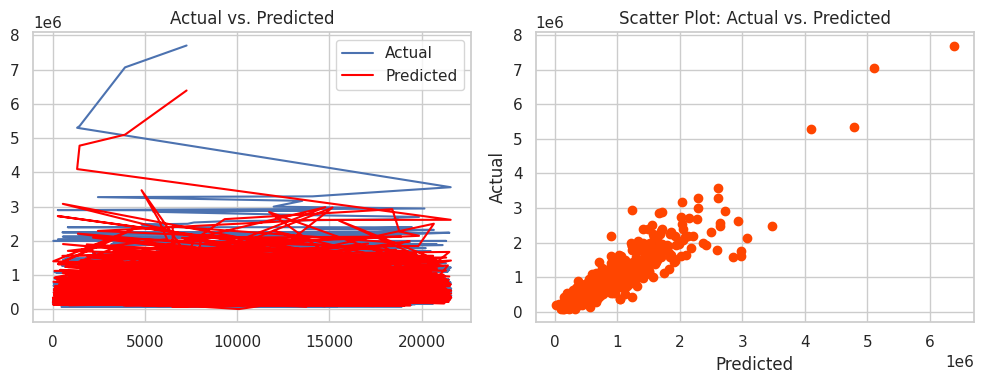

In [85]:
fig, axes =plt.subplots(1, 2, figsize=(10, 4))
sorted_actual3 = compare3['Actual'].sort_values()
sorted_predicted3 = compare3.loc[sorted_actual3.index, 'Predicted']

axes[0].plot(sorted_actual3, label='Actual')
axes[0].plot(sorted_predicted3, color='red', label='Predicted')
axes[0].set_title('Actual vs. Predicted')
axes[0].legend()


axes[1].scatter(compare3['Predicted'], compare3['Actual'], color='orangered')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Scatter Plot: Actual vs. Predicted')

plt.tight_layout()
plt.show()

In [86]:
# In this project there is no overfitiing. Dropout and Batch Normalisation is used for educational practice purpose.